<a href="https://colab.research.google.com/github/eswarpeddinti98/newproject/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Submission Guidelines:**


*   Once you are done with the examination please, File -> Download .ipynb
*   Add your full name to the file name: Firstname_Lastname.ipynb
*   Upload the .ipynb file to Moodle.

# **Examination Starts Here:**

## Data Download (5 points)
*   Check the current tensorflow version
*   Download data from this URL: https://storage.googleapis.com/srh-dataset/flower-classification/flower.zip
*   Unzip the data

In [1]:
!wget https://storage.googleapis.com/adsa-data/flower-classification/flower.zip
!unzip -q flower.zip -d temp


--2024-12-16 08:31:31--  https://storage.googleapis.com/adsa-data/flower-classification/flower.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229567749 (219M) [application/zip]
Saving to: ‘flower.zip’

flower.zip          100%[===================>] 218.93M  12.1MB/s    in 20s     

2024-12-16 08:31:54 (10.7 MB/s) - ‘flower.zip’ saved [229567749/229567749]



## Data Preparation (10 points)
*   Set image at an appropriate size to maximize the accuracy while fitting into the memory
*   Load train and validation dataset
*   Print the classes' name

In [2]:
import tensorflow as tf
import os

# Define the paths
data_dir = 'temp'
batch_size = 32
img_height = 224
img_width = 224

# Load the datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Print the classes' names
class_names = train_ds.class_names
print("Class names:", class_names)


Found 3670 files belonging to 1 classes.
Using 2936 files for training.
Found 3670 files belonging to 1 classes.
Using 734 files for validation.
Class names: ['flower']


## Data Visualization (5 points)
Display some of the training images along with their label

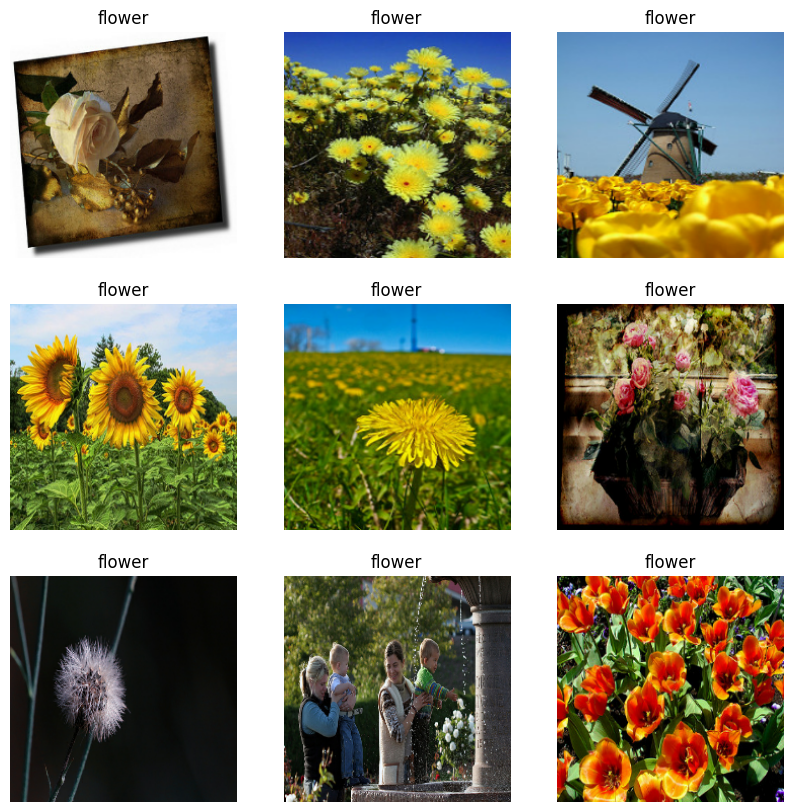

In [3]:
# Display some images with labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):  # Displaying the first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

## Model Design (25 points)
Design a Convolutional Neural Network to solve the image classification problem. Following are the configuration for the Convolutional Neural Network:

====== *Block #1 (4 points)* ======

**Input Layer:**
1. Define an input layer with an appropriate dimension

**Data Augumentation:**
1. Define some augumentation layers

====== *Block #2 (5 points)* ======

**Convolutional Layer #1:**
1. Define a "normal" convolutional layer for images
2. There should be **96** filters
3. The filter size must be 11x11 and stride 4x4
4. There should be no padding
5. The non-linearity should be ReLU

**Normalization Layer #1:**
1. Define a Batch Normalization layer

**Pooling Layer #1:**
1. Define a maximum based pooling layer
2. The pooling size should be 3x3 and stride 2x2

====== *Block #3 (4 points)* ======

**Convolutional Layer #2:**
1. Define a "normal" convolutional layer for images
2. There should be **256** filters
3. The filter size must be 5x5 and stride 1x1
4. There should be padding
5. The non-linearity should be ReLU

**Normalization Layer #2:**
1. Define a Batch Normalization layer

**Pooling Layer #2:**
1. Define a maximum based pooling layer
2. The pooling size should be 3x3 and stride 2x2

====== *Block #4 (4 points)* ======

**Convolutional Layer #3:**
1. Define a "normal" convolutional layer for images
2. There should be **384** filters
3. The filter size must be 3x3 and stride 1x1
4. There should be padding
5. The non-linearity should be ReLU

**Normalization Layer #3:**
1. Define a Batch Normalization layer

====== *Block #5 (4 points)* ======

**Convolutional Layer #4:**
1. Define a "normal" convolutional layer for images
2. There should be **256** filters
3. The filter size must be 3x3 and stride 1x1
4. There should be padding
5. The non-linearity should be ReLU

**Normalization Layer #4:**
1. Define a Batch Normalization layer

**Pooling Layer #4:**
1. Define a maximum based pooling layer
2. The pooling size should be 3x3 and stride 2x2

====== *Block #6 (4 points)* ======

**Flattening:**
1. Convert tensors into vectors

**Fully connected Layer:**
1. Define a fully connected layer with 4096 nodes and ReLU activation

**Regularization Layer:**
1. Define a Dropout layer
2. The dropout rate should be 0.5

**Output Layer:**
1. Define an output layer
2. Activation for the relative task

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define input shape
input_shape = (224, 224, 3)

# Input Layer
inputs = tf.keras.Input(shape=input_shape)

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Apply data augmentation
x = data_augmentation(inputs)

# Block #1
# Convolutional Layer #1
x = layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', padding='valid')(x)
# Normalization Layer #1
x = layers.BatchNormalization()(x)
# Pooling Layer #1
x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

# Block #2
# Convolutional Layer #2
x = layers.Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same')(x)
# Normalization Layer #2
x = layers.BatchNormalization()(x)
# Pooling Layer #2
x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

# Block #3
# Convolutional Layer #3
x = layers.Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)
# Normalization Layer #3
x = layers.BatchNormalization()(x)

# Block #4
# Convolutional Layer #4
x = layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)
# Normalization Layer #4
x = layers.BatchNormalization()(x)
# Pooling Layer #4
x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

# Block #5
# Flattening
x = layers.Flatten()(x)
# Fully Connected Layer
x = layers.Dense(4096, activation='relu')(x)
# Regularization Layer
x = layers.Dropout(0.5)(x)

# Output Layer
num_classes = len(class_names)  # Ensure 'class_names' is defined and loaded from the dataset
outputs = layers.Dense(num_classes, activation='softmax')(x)




## Model Compiling (5 points)
1.   Choose an optimizer
2.   Choose an appropriate loss function
3.   The metric should be accuracy
4.   Print the model's summary



In [5]:
# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 54, 54, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 26, 26, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,646,273 (109.28 MB)

 Trainable params: 28,644,289 (109.27 MB)

 Non-trainable params: 1,984 (7.75 KB)

## Callback (5 points)
Define callback functions for:
*   Early Stopping
*   Learning Rate Reduction

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_reduction_callback = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    factor=0.5,          # Factor by which the learning rate will be reduced. New LR = LR * factor
    patience=3,          # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1            # Verbosity mode. 0 = silent, 1 = update messages.
)


## Model Training (5 points)
Train the model for 15 epochs with callbacks

In [7]:
history = model.fit(
    train_ds,
    epochs=15,
    validation_data=val_ds,
    callbacks=[early_stopping_callback, lr_reduction_callback]
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/15
91/92 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 6/15
9

## Training Visualization (5 points)
Plot training history with training and validation's loss and accuracy

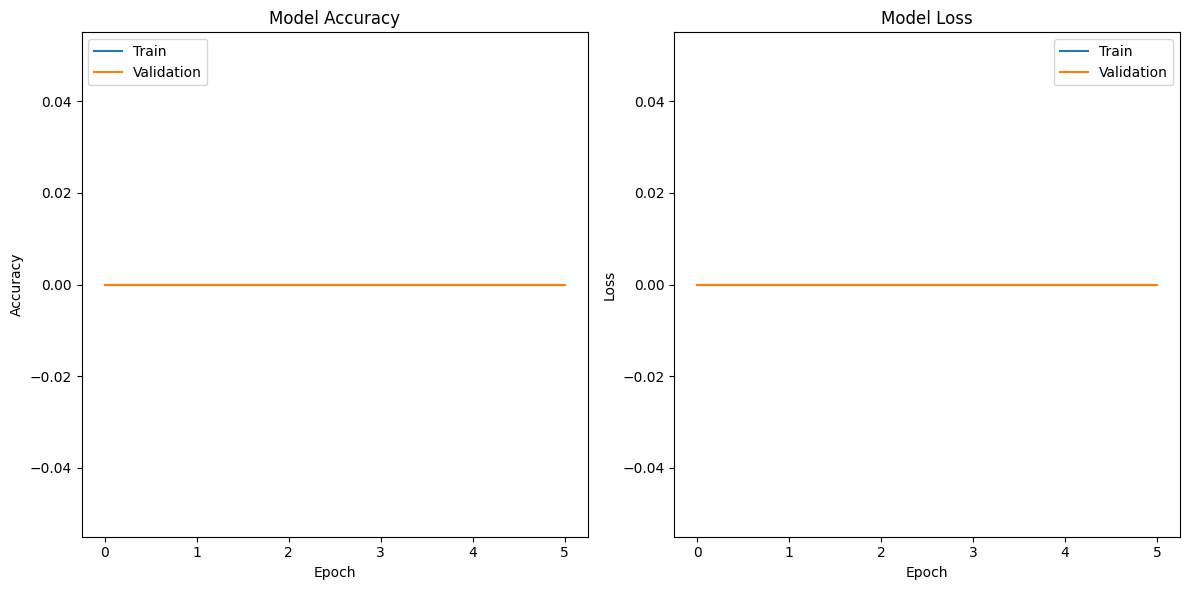

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


## Transfer Learning (20 points)
1. Choose an appropriate pre-trained model without the top (last) layers
2. Rebuild the last layers with GlobalAveragePooling -> BatchNormalization -> Dropout -> Output
3. Freeze the pretrained weights & unfreeze the added layers
4. Choose an optimizer and an appropriate loss function
5. Print the model's summary



In [9]:

# Load the pre-trained model without the top layers
base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

# Freeze the base model's layers
base_model.trainable = False

# Rebuild the last layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create the transfer learning model
transfer_model = models.Model(inputs=base_model.input, outputs=outputs)

# Compile the model
transfer_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model's summary
transfer_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,264,385 (8.64 MB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 2,260,544 (8.62 MB)

## Fine-turning Model (5 points)
Fine-turn the model for 15 epochs with callbacks

In [10]:
# prompt: Fine-turn the model for 15 epochs with callbacks

history_transfer = transfer_model.fit(
    train_ds,
    epochs=15,
    validation_data=val_ds,
    callbacks=[early_stopping_callback, lr_reduction_callback]
)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 304ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/15
91/92 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04

## Confusion Matrix (5 points)
Draw a confusion matrix for the validation dataset

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


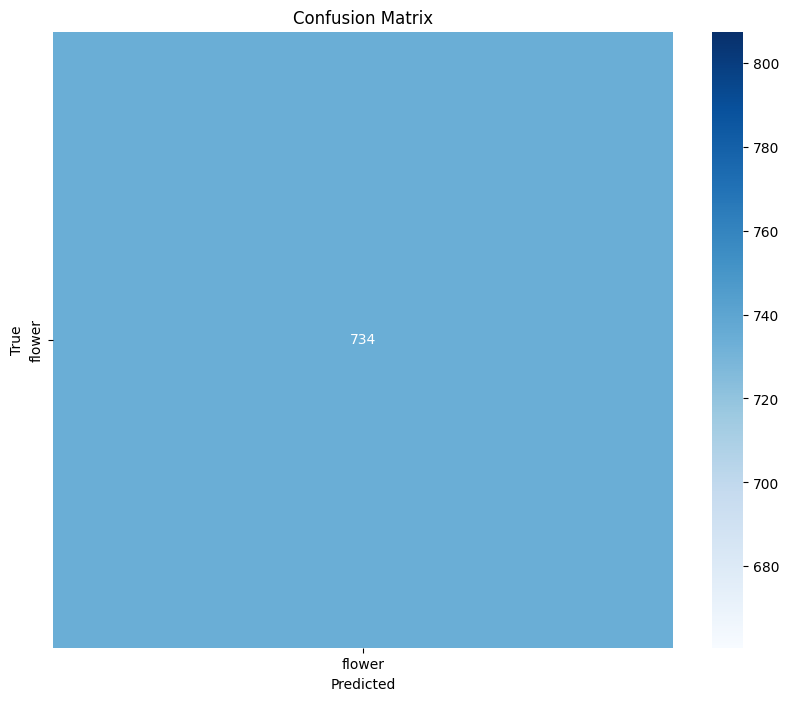

In [11]:
# prompt: Draw a confusion matrix for the validation dataset

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels for the validation set
y_pred = np.argmax(transfer_model.predict(val_ds), axis=1)

# Get the true labels
y_true = []
for images, labels in val_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Result Preview (5 points)
Display some of the images in the validation dataset along with their prediction's label and accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


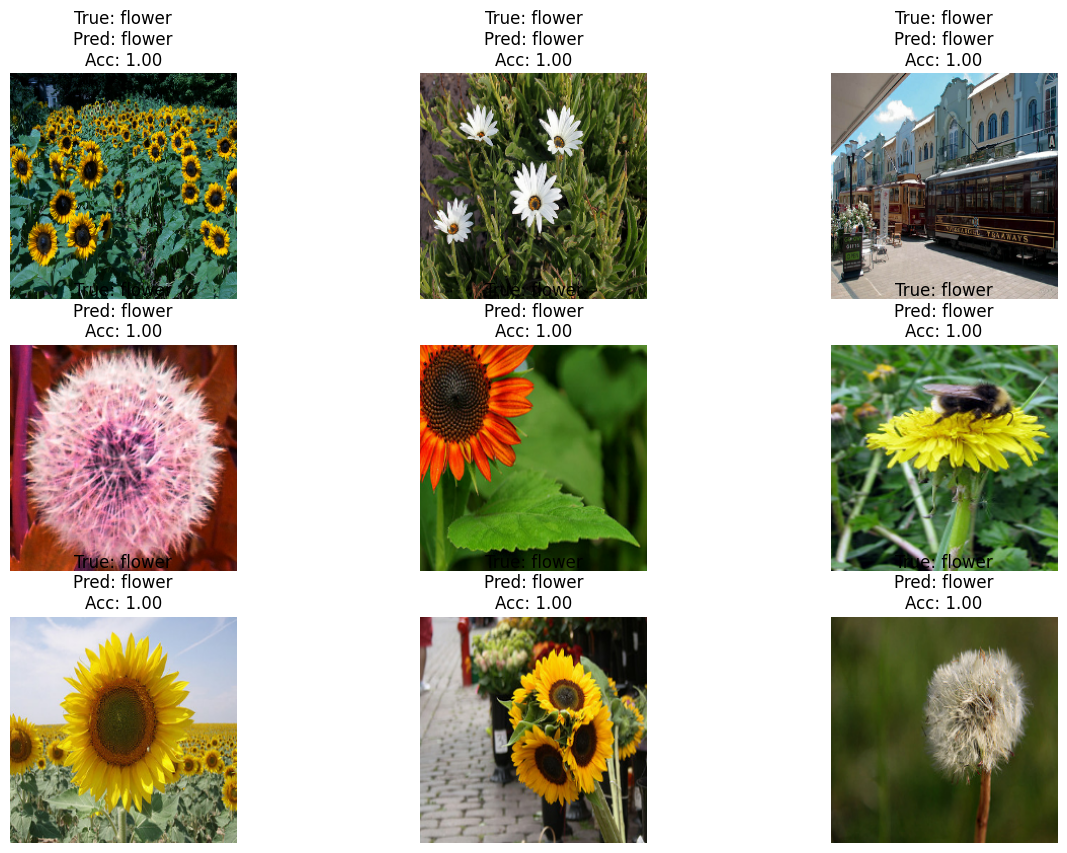

In [12]:
# prompt: Display some of the images in the validation dataset along with their prediction's label and accuracy

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'val_ds', 'transfer_model', and 'class_names' are defined from the previous code

plt.figure(figsize=(15, 10))
for images, labels in val_ds.take(1):  # Take one batch from the validation dataset
    for i in range(9):  # Display 9 images from the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Predict the label for the current image
        prediction = transfer_model.predict(np.expand_dims(images[i], axis=0))
        predicted_label = np.argmax(prediction)
        accuracy = np.max(prediction)

        plt.title(f"True: {class_names[labels[i]]}\nPred: {class_names[predicted_label]}\nAcc: {accuracy:.2f}")
        plt.axis("off")
plt.show()